In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

In [16]:
def plot_convergence_shaded(ax, els, 
        experiments_num, 
        m, fname, 
        colors=['blue', 'orange'], 
        legends=['LogBarrier', 'SafeOpt', r'$f^0(x)$'], 
        fontsize=11, 
        labelsize=11):
    for i, el in enumerate(els):
        if experiments_num > 1:
            el_avg = np.mean(el, axis=0)
            el_max = np.max(el, axis=0)
            el_min = np.min(el, axis=0)
            el_std = np.std(el, axis=0)
        else:
            el_avg = el
            el_max = el
            el_min = el
            el_std = np.zeros(np.size(el))
        ax.fill_between(range(np.size(el_avg)), 
                             el_min, el_max,
                             color=colors[i], alpha=0.2, edgecolor=None)
        if legends[i] == r'$f^0(x)$':
            attributes = dict(linestyle='dashed', linewidth=2.5)
        else:
            linestyle = attributes = dict()
        ax.plot(range(np.size(el_avg)), 
         el_avg, color=colors[i], label=legends[i], **attributes)
        label = dict(accuracy=r"$f(x_t) - f^*$""\n(Accuracy)", constraints=r"$\max_i f^i(x_t)$""\n(Constraints)",
                    grad_norms=r"$\|\nabla f(x_t)\|$""\n(Gradients Norm)")[m]
        if ax.get_subplotspec().is_last_row():
            ax.set_xlabel(r"$t$", fontsize=fontsize)
        if ax.get_subplotspec().is_first_col():
            ax.set_ylabel(label, fontsize=fontsize)

    
def plot_experiments(d, axes_col, problem_name):
    with open('../runs/SafeOpt_' + problem_name + '_d' + str(d) + '.npy', 'rb') as file:
        SO_errors = np.load(file)
        SO_cons = np.load(file) 
    with open('../runs/LB_SGD_' + problem_name + '_d' + str(d) + '.npy', 'rb') as file:
        LB_errors = np.load(file)
        LB_cons = np.load(file) 
    experiments_num = 5
    plot_convergence_shaded(axes_col[0], [LB_errors, SO_errors], 
                          experiments_num, 
                          colors=['royalblue', 'magenta'], 
                          legends=['LB-SGD', 'SafeOpt' ],
                          fname = "../runs/objective_" + problem_name +'_d' + str(d), m="accuracy")
    axes_col[0].annotate(r'$d = {}$'.format(d), (0.75, 0.85), fontsize=11, xycoords='axes fraction')

    shape = np.shape(SO_errors)
    plot_convergence_shaded(axes_col[1], [LB_cons, SO_cons, np.zeros(shape)], 
                          experiments_num, 
                          colors=['royalblue', 'magenta', 'orangered'], 
                          legends=['LB-SGD', 'SafeOpt',r'$$'],
                          fname="../runs/constraints_" + problem_name +'_d' + str(d), m="constraints")

/tmp/ipykernel_14789/1600908454.py:8: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout(h_pad=0.5, w_pad=0.5)


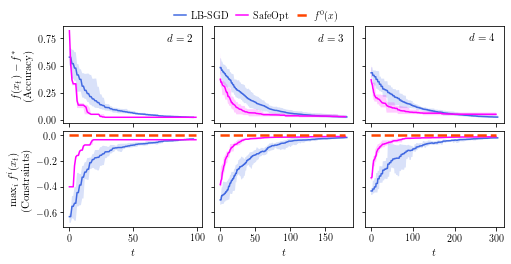

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(2.4 * 3, 3.5), constrained_layout=True, sharey='row', sharex='col')
for d, axes_col in zip(range(2, 5), axes.T):
    plot_experiments(d, axes_col, 'QP')
handles = axes[1, 0].get_legend_handles_labels()
leg = fig.legend(*handles, loc='center',
                 bbox_to_anchor=(0.5, 1.), ncol=5, frameon=False, fontsize=10, numpoints=1,
                 labelspacing=0.2, columnspacing=0.8, handlelength=1.2, handletextpad=0.5)
fig.tight_layout(h_pad=0.5, w_pad=0.5)
artist_to_keep = [leg]
plt.savefig('figura.pdf', bbox_extra_artists=artist_to_keep, bbox_inches='tight')

